In [30]:
import numpy as np
#求和函数正常
def plot(data, val_acc):
    plot_data = {'step':[], 'mean':[], 'upper':[], 'lower':[]}
    mean = []
    for i in range(0, len(val_acc)):#i用来指代每一条数据
        plot_data['step'].append(val_acc[i].step)
        for d in data:#d是每个event的数据
            try:
                mean.append(d.scalars.Items('ray/tune/episode_reward_shake_mean')[i].value)#塞入每个event在同一步的数据 取其他图要改
            except IndexError as Error:
                print(i)
        #mean = mean/len(data)
        mean = np.array(mean)
        plot_data['mean'].append(mean.mean())
        plot_data['lower'].append(mean.min())
        plot_data['upper'].append(mean.max())
        mean = []
    return(plot_data)  


In [31]:
import tensorboard.backend.event_processing.event_accumulator as ea
data_a4c = []
for root,dirs,files in os.walk(r"runs_A4C/SpaceInvadersNoFrameskip-v4"):
        for file in files:
            print(os.path.join(root, file))
            if file == '.DS_Store':
                pass
            else:
                data_a4c.append(ea.EventAccumulator(os.path.join(root, file)))

for i in data_a4c:
    i.Reload()
print(data_a4c[0].scalars.Keys())
length = []
for i in range(0,len(data_a4c)):
    length.append(len(data_a4c[i].scalars.Items('ray/tune/episode_reward_shake_mean')))#取最短的长度,这里面有200M的 取其他图要改, 数据长度有多少条
print(length)
length = np.array(length)
index = np.argmin(length)
print(length.min())
print(index)
val_acc=data_a4c[index].scalars.Items('ray/tune/episode_reward_shake_mean') #要改成最小的 取其他图要该
print(val_acc[1])

runs_A4C/SpaceInvadersNoFrameskip-v4/.DS_Store
runs_A4C/SpaceInvadersNoFrameskip-v4/events.out.tfevents.1598186170.iZ8vb75i2jsj7xpqje40tfZ
runs_A4C/SpaceInvadersNoFrameskip-v4/events.out.tfevents.1605361525.pdluser-System-Product-Name
['ray/tune/episode_reward_mean', 'ray/tune/episode_reward_median', 'ray/tune/episode_reward_min', 'ray/tune/episode_reward_max', 'ray/tune/episode_reward_shake_mean', 'ray/tune/episode_reward_shake_median', 'ray/tune/episode_reward_shake_min', 'ray/tune/episode_reward_shake_max', 'ray/tune/episode_reward_time_mean', 'ray/tune/episode_reward_time_median', 'ray/tune/episode_reward_time_min', 'ray/tune/episode_reward_time_max']
[236, 2788]
236
0
ScalarEvent(wall_time=1598186182.6224372, step=200, value=98.5)


In [32]:
import tensorboard.backend.event_processing.event_accumulator as ea
data_gala = []
for root,dirs,files in os.walk(r"runs_gala/QbertNoFrameskip-v4"):
        for file in files:
            #print(os.path.join(root, file))
            data_gala.append(ea.EventAccumulator(os.path.join(root, file)))

for i in data_gala:
    i.Reload()
print(data_gala[0].scalars.Keys())
length = []
for i in range(0,len(data_gala)):
    length.append(len(data_gala[i].scalars.Items('ray/tune/episode_reward_shake_mean')))#取最短的长度#这里面有200M的 取其他图要改
print(length)
length = np.array(length)
index = np.argmin(length)
print(length.min())
val_acc_gala=data_gala[index].scalars.Items('ray/tune/episode_reward_shake_mean') #要改成最小的 取其他图要改
print(val_acc_gala[1])

IndexError: list index out of range

In [23]:
plot_data_a4c = plot(data_a4c, val_acc)
print('mean', np.shape(plot_data_a4c['mean']))
print('step', np.shape(plot_data_a4c['step']))
#smooth_data = smooth(plot_data['mean'], sm=10)
#plot_data['mean'] = smooth_data
print(len(val_acc))
print(plot_data_a4c['step'][0:5])
print(plot_data_a4c['mean'][0:5])
print(plot_data_a4c['upper'][0:5])
print(plot_data_a4c['lower'][0:5])
#print(plot_data['mean'][1])

mean (236,)
step (236,)
236
[100, 200, 300, 400, 500]
[113.25, 99.75, -58.0, -46.25, 56.75]
[129.0, 101.0, -48.5, -33.5, 68.5]
[97.5, 98.5, -67.5, -59.0, 45.0]


In [ ]:
plot_data_gala = plot(data_gala, val_acc_gala)
print('mean', np.shape(plot_data_gala['mean']))
print('step', np.shape(plot_data_gala['step']))

print(plot_data_gala['step'][0:5])
print(plot_data_gala['mean'][0:5])
print(plot_data_gala['upper'][0:5])
print(plot_data_gala['lower'][0:5])
#print(plot_data['mean'][1])

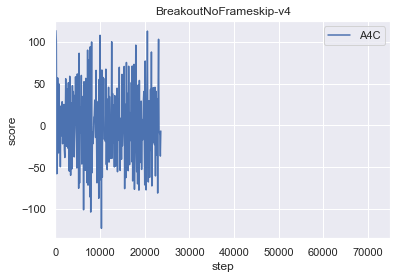

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
%matplotlib inline

plot_data_a4c = plot(data_a4c, val_acc)
plot_data_gala = plot(data_gala, val_acc_gala)


plot_data_a4c['mean'] = np.array(plot_data_a4c['mean'])
plot_data_a4c['step'] = np.array(plot_data_a4c['step'])
plot_data_a4c['lower'] = np.array(plot_data_a4c['lower'])
plot_data_a4c['upper'] = np.array(plot_data_a4c['upper'])

plot_data_gala['mean'] = np.array(plot_data_gala['mean'])
plot_data_gala['step'] = np.array(plot_data_gala['step'])
plot_data_gala['lower'] = np.array(plot_data_gala['lower'])
plot_data_gala['upper'] = np.array(plot_data_gala['upper'])



sns.set(style="darkgrid", font_scale=1)
plt.xlabel('step')
plt.ylabel('score')
plt.title('BreakoutNoFrameskip-v4')
plt.xlim(0, 75000)

sns.lineplot(x = 'step', y = 'mean', label = 'A4C',data=plot_data_a4c, legend="full", ci=95)

sns.lineplot(x = 'step', y = 'mean', label = 'Gala',data=plot_data_gala, legend="full", ci=95)


#plt.fill_between(xnew, smooth_lower, smooth_upper, alpha=0.3)
plt.show()
